### Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd
import h5py as h5
from keras.utils.np_utils import to_categorical

### Loading the X_train, X_test, Y_train, Y_test, X_val and Y_val datasets from the h5py file

In [4]:
with h5.File('SVHN_single_grey1.h5') as hdf:
    ls = list(hdf.keys())
    data = hdf.get('X_test')
    data1 = hdf.get('X_train')
    data2 = hdf.get('X_val')
    data3 = hdf.get('y_test')
    data4 = hdf.get('y_train')
    data5 = hdf.get('y_val')
    x_test = np.array(data)
    x_train = np.array(data1)
    x_val = np.array(data2)
    y_test = np.array(data3)
    y_train = np.array(data4)
    y_val = np.array(data5)

E:\Softwares\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [5]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)


In [6]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000,)
(18000,)
(60000,)


### Data Preprocessing

In [7]:

trainX = x_train.reshape(42000, 1024)
trainX.shape
testX = x_test.reshape(18000, 1024)
testX.shape
valX = x_val.reshape(60000, 1024)
valX.shape

# # normalize inputs from 0-255 to 0-1
trainX = trainX / 255.0
testX = testX / 255.0
valx = valX / 255.0


x_train = trainX
y_train = y_train
x_val = valX


x_test = testX
y_test = y_test
y_val = y_val

(42000, 1024)

(18000, 1024)

(60000, 1024)

### Converting the class matrices Y_train, Y_test and Y_val into one hot vectors

In [8]:
y_train_vector = to_categorical(y_train)
y_test_vector = to_categorical(y_test)
y_val_vector = to_categorical(y_val)

### Print the train, test and val shapes

In [9]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)
(42000,)
(18000,)
(60000,)


### Visualizing the first 10 images in X_train and the corresponding Y_train labels

<Figure size 720x72 with 0 Axes>

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

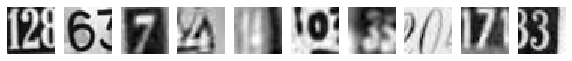

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [11]:
model = Sequential()

In [12]:
model.add(Dense(50, input_shape = (1024, )))

model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:

history = model.fit(x_train, y_train, batch_size = 300, epochs = 20, verbose = 1)

Epoch 1/20
42000/42000 [==============================] - 2s 36us/step - loss: 2.3201 - accuracy: 0.1011
Epoch 2/20
42000/42000 [==============================] - 1s 29us/step - loss: 2.3100 - accuracy: 0.1060
Epoch 3/20
42000/42000 [==============================] - 1s 29us/step - loss: 2.3073 - accuracy: 0.1046
Epoch 4/20
42000/42000 [==============================] - 1s 31us/step - loss: 2.3056 - accuracy: 0.1022
Epoch 5/20
42000/42000 [==============================] - 1s 30us/step - loss: 2.3042 - accuracy: 0.1015
Epoch 6/20
42000/42000 [==============================] - 1s 29us/step - loss: 2.3031 - accuracy: 0.1008
Epoch 7/20
42000/42000 [==============================] - 1s 30us/step - loss: 2.3021 - accuracy: 0.1015
Epoch 8/20
42000/42000 [==============================] - 1s 30us/step - loss: 2.3013 - accuracy: 0.1016
Epoch 9/20
42000/42000 [==============================] - 1s 30us/step - loss: 2.3007 - accuracy: 0.1032
Epoch 10/20
42000/42000 [==============================

In [15]:
results = model.evaluate(x_test, y_test)

18000/18000 [==============================] - 1s 76us/step


In [16]:
print('Test accuracy: ', results)

Test accuracy:  [2.2964508548312716, 0.11372222006320953]


### Loading the original dataset again

#### Defining the Fully Connected Layer

In [17]:
import numpy as np 

class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None

    def forward(self, X):
        self.X = X
        output = np.dot(self.X, self.W) + self.b
        return output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

#### Defining the Rectified Linear Activation Layer

In [18]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

#### Defining the softmax function

In [19]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

#### Defining the Cross Entropy Loss

In [20]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

### Loading the dataset : Lets us load the training and the test data and check the size of the tensors. Lets us also display the first few images from the training set.

In [21]:
from keras.datasets import mnist
from keras.utils import np_utils
import h5py as h5

(train_features, train_targets), (test_features, test_targets) = mnist.load_data()

with h5.File('SVHN_single_grey1.h5') as hdf:
    ls = list(hdf.keys())
    data = hdf.get('X_test')
    data1 = hdf.get('X_train')
    data2 = hdf.get('X_val')
    data3 = hdf.get('y_test')
    data4 = hdf.get('y_train')
    data5 = hdf.get('y_val')
    test_features = np.array(data)
    train_features = np.array(data1)
   # x_val = np.array(data2)
    test_targets = np.array(data3)
    train_targets = np.array(data4)
   # y_val = np.array(data5)

train_features = train_features.reshape(42000, 1024)
print(train_features.shape)
test_features = test_features.reshape(18000, 1024)
print(test_features.shape)


# # normalize inputs from 0-255 to 0-1
train_features = train_features / 255.0
test_features = test_features / 255.0

print(train_targets.shape)
print(test_targets.shape)

X_train = train_features
y_train = train_targets

X_val = test_features
y_val = test_targets

E:\Softwares\lib\site-packages\ipykernel_launcher.py:7: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  import sys


(42000, 1024)
(18000, 1024)
(42000,)
(18000,)


<Figure size 720x72 with 0 Axes>

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

(-0.5, 31.5, 31.5, -0.5)

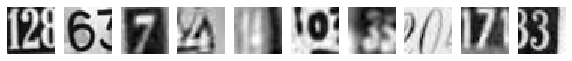

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [22]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

### Here, we define the container NN class that enables the forward prop and backward propagation of the entire network. Note, how this class enables us to add layers of different types and also correctly pass gradients using the chain rule.

In [23]:
class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

In [24]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

In [25]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]

        minibatches.append((X_batch, y_batch))
    return minibatches

#### The traning loop

In [26]:
def sgd(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None, Lambda=0, verb=True):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Epoch {3}/{4}: Loss = {0} | Training Accuracy = {1}".format(mean_train_loss, train_acc, val_acc, i, epoch))
    return net, val_acc

#### Checking the accuracy of the model 

In [27]:
def check_accuracy(y_true, y_pred):
    count = 0
    for i,j in zip(y_true, y_pred):
        if int(i)==j:
            count +=1
    return float(count)/float(len(y_true))

#### Invoking all that we have created until now

In [28]:
from random import shuffle


## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes))

    nn, val_acc = sgd(nn, X_train , y_train, minibatch_size=1000, epoch=iterations, learning_rate=learning_rate,\
                      X_val=X_val, y_val=y_val, Lambda=Lambda, verb=verb)
    return val_acc

### Double Check that the loss is reasonable : Disable the regularization

In [29]:
lr = 0.00001
Lambda = 0
data = train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.3164456597271004 | Training Accuracy = 0.10111904761904762


### Now, lets crank up the Lambda(Regularization)and check what it does to our loss function.

In [30]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.3213043001286455 | Training Accuracy = 0.10666666666666667


0.10661111111111111

In [31]:
lr = 0.0001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.306473550125092 | Training Accuracy = 0.09269047619047618
Epoch 50/500: Loss = 2.2998949191508604 | Training Accuracy = 0.11319047619047619
Epoch 100/500: Loss = 2.2973221682225473 | Training Accuracy = 0.1428095238095238
Epoch 150/500: Loss = 2.295044571301056 | Training Accuracy = 0.16202380952380951
Epoch 200/500: Loss = 2.292983869341379 | Training Accuracy = 0.17476190476190476
Epoch 250/500: Loss = 2.291095563591717 | Training Accuracy = 0.18045238095238095
Epoch 300/500: Loss = 2.289351409884023 | Training Accuracy = 0.1849047619047619
Epoch 350/500: Loss = 2.2877315623347885 | Training Accuracy = 0.18911904761904763
Epoch 400/500: Loss = 2.2862209305251096 | Training Accuracy = 0.19157142857142856
Epoch 450/500: Loss = 2.284807403864125 | Training Accuracy = 0.19385714285714287


0.18533333333333332

### Start with small regularization and find learning rate that makes the loss go down.

- we start with Lambda(small regularization) = 1e-7
- we start with a small learning rate = 1e-7

In [32]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.3270416138352323 | Training Accuracy = 0.09997619047619048
Epoch 50/500: Loss = 2.325370762777827 | Training Accuracy = 0.1
Epoch 100/500: Loss = 2.3238204922867878 | Training Accuracy = 0.09997619047619048
Epoch 150/500: Loss = 2.322381252306343 | Training Accuracy = 0.1000952380952381
Epoch 200/500: Loss = 2.321044389054591 | Training Accuracy = 0.10014285714285714
Epoch 250/500: Loss = 2.3198020401682293 | Training Accuracy = 0.10028571428571428
Epoch 300/500: Loss = 2.3186470447970513 | Training Accuracy = 0.10071428571428571
Epoch 350/500: Loss = 2.3175728661994777 | Training Accuracy = 0.1009047619047619
Epoch 400/500: Loss = 2.316573524831633 | Training Accuracy = 0.10080952380952381
Epoch 450/500: Loss = 2.3156435402780007 | Training Accuracy = 0.1009047619047619


0.10211111111111111

In [34]:
lr = 1e6
Lambda = 1e-7
train_and_test_loop(200, lr, Lambda)

Epoch 0/200: Loss = 32.360761025008465 | Training Accuracy = 0.09923809523809524
Epoch 50/200: Loss = 32.76425081657661 | Training Accuracy = 0.11878571428571429
Epoch 100/200: Loss = 32.511624337802395 | Training Accuracy = 0.11492857142857144
Epoch 150/200: Loss = 32.64056910301008 | Training Accuracy = 0.14866666666666667


0.12383333333333334

In [35]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(200, lr, Lambda)

Epoch 0/200: Loss = 32.4551960562773 | Training Accuracy = 0.09992857142857142
Epoch 50/200: Loss = 32.654990628835534 | Training Accuracy = 0.1074047619047619
Epoch 100/200: Loss = 32.77032603570787 | Training Accuracy = 0.13038095238095238
Epoch 150/200: Loss = 32.51776456278656 | Training Accuracy = 0.12873809523809523


0.10088888888888889

###  Run coarse search for 10 iterations


In [37]:
import math
for k in range(1,4):
    lr = math.pow(4, np.random.uniform(-7.0, 4.0))
    Lambda = math.pow(4, np.random.uniform(-5,5))
    best_acc = train_and_test_loop(50, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 4, best_acc, lr, Lambda))

Try 1/4: Best_val_acc: 0.10044444444444445, lr: 0.8504557288094236, Lambda: 0.001878150591643543

Try 2/4: Best_val_acc: 0.10883333333333334, lr: 41.14576231491714, Lambda: 2.0103188864778994

Try 3/4: Best_val_acc: 0.13833333333333334, lr: 0.00021150137485093402, Lambda: 8.274547814905977



### Now run finer search

In [38]:
import math
for k in range(1,4):
    lr = math.pow(4, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(4, np.random.uniform(-5,2))
    best_acc = train_and_test_loop(50, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 4, best_acc, lr, Lambda))

Try 1/4: Best_val_acc: 0.18461111111111111, lr: 0.05362442930332755, Lambda: 2.4225384842510644

Try 2/4: Best_val_acc: 0.1935, lr: 0.034139654070256556, Lambda: 0.012077951322243234

Try 3/4: Best_val_acc: 0.19344444444444445, lr: 0.016055801989391078, Lambda: 0.00559699572687655



### best hyperparameters found in the previous step

In [49]:
lr = 0.034139654070256556
Lambda = 0.012077951322243234
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.315412369473211 | Training Accuracy = 0.13861904761904761


0.1346111111111111